### ARPES instrument resolution

In [1]:
import arpespythontools as arp
from scipy import signal 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import rcParamsDefault 

In [2]:
plt.rcParams.update(rcParamsDefault)
large = 22; med = 16; #small = 12
params = {'legend.fontsize': med,
      'figure.figsize': (8, 6),
      'axes.labelsize': med,
      'axes.titlesize': med,
      'xtick.labelsize': med,
      'ytick.labelsize': med,
      'figure.titlesize': large,
      'image.origin': 'lower',
      'xtick.major.size': 8,
      'ytick.major.size': 8,
      'xtick.major.width': 1,
      'ytick.major.width': 1,
      'xtick.minor.size': 4,
      'xtick.minor.width': 1,
      'ytick.minor.size': 4,
      'ytick.minor.width': 1,
      'axes.linewidth': 1,
      'font.family': 'sans-serif', 
      'font.weight': 'light', # ultralight, light, regular, medium, bold 
      'font.style': 'normal', # normal, italic
         }
plt.rcParams.update(params)

In [3]:
data, energy, k = arp.import_itx('kspectra.itx'); 

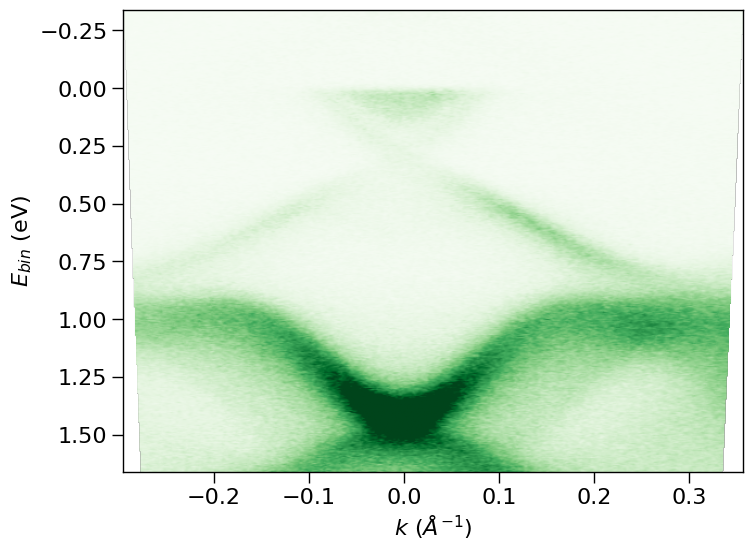

In [4]:

plt.imshow(data, origin = 'lower', aspect = 'auto', vmax= 800, \
           extent = (k[0], k[-1], energy[0], energy[-1])); 
plt.xlabel("$k~(\AA^{-1})$"); 
plt.ylabel('$E_{bin}$ (eV)'); 
plt.set_cmap('Greens'); 
plt.show()

In [5]:
edc = arp.line_profile(data, k, -0.25, 0.25); 

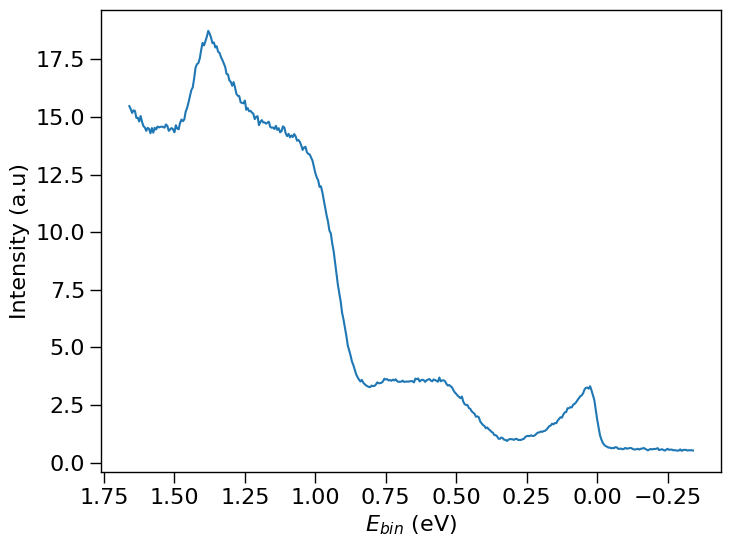

In [6]:
plt.figure(figsize = (8, 6)); 
plt.plot(energy, edc/10000); 
plt.xlabel('$E_{bin}$ (eV)'); 
plt.ylabel('Intensity (a.u)'); 
plt.gca().invert_xaxis();
plt.show(); 

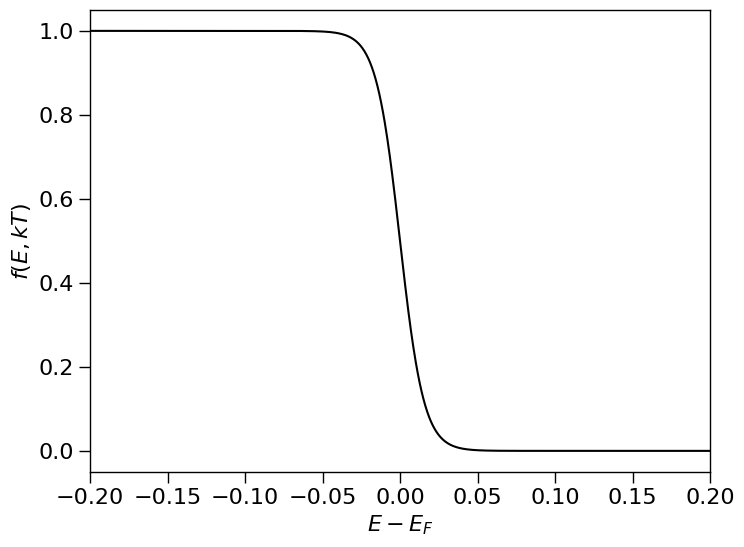

In [7]:
def f(E, kT): 
    return 1/(np.exp(E/kT) + 1); 

kT = 0.0257*90/300; # corresponding to 90 K temperature 
E = np.linspace(-2, 2, 10000); 

plt.figure(figsize = (8, 6)); 
plt.rcParams.update({'font.size': 16}); 
plt.plot(E, f(E, kT), 'k'); 
plt.xlim(-0.2, 0.2); 
plt.xlabel('$E - E_F$'); 
plt.ylabel('$f(E, kT)$'); 
plt.show(); 

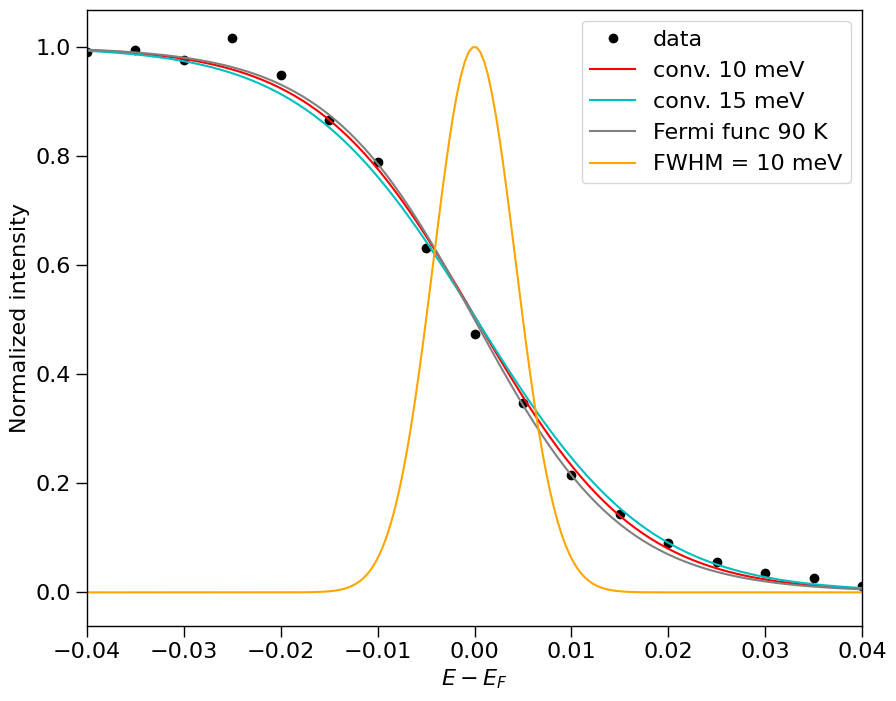

In [8]:
def g(x, sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-x**2/(2*sigma*sigma)); 

x = np.linspace(-2, 2, 10000); 
sigma = 0.01/(2*np.sqrt(2*np.log(2))); # convert full width at half maxima 
sigma2 = 0.015/(2*np.sqrt(2*np.log(2))); # convert full width at half maxima 

fx = f(E, kT); 
gx = g(x, sigma); 
gx2 = g(x, sigma2); 
conv = signal.convolve(fx, gx, mode='same')/sum(gx); 
conv2 = signal.convolve(fx, gx2, mode='same')/sum(gx2); 

plt.figure(figsize = (10, 8)); 
plt.plot(energy[300:350]*(-1), (edc[300:350] - 6200)/26500, 'ko', label='data'); 
plt.plot(x, conv, 'r', label='conv. 10 meV'); 
plt.plot(x, conv2, 'c', label='conv. 15 meV'); 
plt.plot(E, fx, 'grey', label='Fermi func 90 K'); 
plt.plot(E, gx/g(0, sigma), 'orange', label='FWHM = 10 meV');
plt.xlim(-0.04, 0.04); 
plt.legend(); 
plt.xlabel('$E - E_F$'); 
plt.ylabel('Normalized intensity');
plt.show(); 